# Capstone1 Proposal
Small and medium enterprises (SMEs) are businesses that have revenues, assets and a number of employees below a certain threshold. Although the definition of SMEs is different from country to country, their important role in the economy is undeniable. They are one of the strongest drivers of economic development, innovation and employment. The access to finance is recognized as the greatest obstacle to the growth of SMEs. The financing gap for SMEs is huge. Millions of SMEs have unmet financing needs all over the world. Lenders who can address this matter have great growing potential. The challenge for these lenders is how to manage loan risk efficiently and make accurate decisions. There are two basic risks here: one is a business loss results from not lending the good candidate, and the other is the financial loss for lending the candidate is at bad risk. Therefore, the ability to recognize good candidates who are able to make payments is crucial.

This project focuses on predicting whether a company is going to miss payments if it is lent. The dataset is taken from the South African digital lender Lulalend. The data set consists of 1346 rows, representing 1346 companies who are already Lulalend’s customers, and 40 columns. This dataset has continuous, nominal and categorical data along with missing values. The variable of interest is “bad”. It contains the payment history of these companies, either 1 meaning company missed payments or 0 meaning company did not miss payments. 


# Data Exploratory

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading data and Reading it.

In [63]:
start_df=pd.read_csv('/Users/vnguyenair/Desktop/vy_capstone1/NEW_DATA.csv',low_memory=False)

In [64]:
start_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 40 columns):
AssessmentRunId                        1346 non-null int64
province                               1346 non-null object
AdvanceId                              1346 non-null int64
bad                                    1346 non-null int64
outstanding_capital                    1346 non-null float64
balance                                1346 non-null float64
overdraft_limit_exceeds                391 non-null float64
recent_long_term_consumer_liability    764 non-null float64
minimum_latest_bank_statements         820 non-null float64
minimum_consumer_assets                820 non-null float64
minimum_tax_activity                   820 non-null float64
other_funding                          1247 non-null float64
minimum_other_funding                  1248 non-null float64
unpaids                                1247 non-null float64
minimum_unpaids                        1248 non-nul

In [65]:
start_df.head()

,AssessmentRunId,province,AdvanceId,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,...,business_social_media_presence,business_industry,business_linked_to_affiliate,business_linked_to_partner,business_has_website,business_account_linked,director_credit_rating,codix_score,bank_balance_affordability,turnover_consistency
0,38389,WesternCape,33325,1,20000.00,4533.34,0.0,1.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.659764,0.630893,0.141855,0.439428
1,38173,WesternCape,33114,0,0.00,0.00,0.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.759578,0.717661,0.621779,0.433922
2,38138,Gauteng,33075,0,0.00,-19466.66,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.483418,0.000000,0.127326,0.356817
3,37642,WesternCape,32689,0,416666.66,52916.67,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.792966,0.949238,0.239715,0.400076
4,37376,Gauteng,32563,0,0.00,-87173.10,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,1.0,1.0,0.736877,0.000000,0.514813,0.349812


In [66]:
start_df.columns

Index(['AssessmentRunId', 'province', 'AdvanceId', 'bad',
       'outstanding_capital', 'balance', 'overdraft_limit_exceeds',
       'recent_long_term_consumer_liability', 'minimum_latest_bank_statements',
       'minimum_consumer_assets', 'minimum_tax_activity', 'other_funding',
       'minimum_other_funding', 'unpaids', 'minimum_unpaids',
       'minimum_source_of_income', 'minimum_decreasing_overdraft',
       'source_of_income', 'overdraft', 'liquidity', 'minimum_current_arrears',
       'minimum_codix_outcome', 'previous_funding_repayment',
       'minimum_bank_statements', 'minimum_balance_based_affordability',
       'minimum_requirements', 'business_health',
       'self_published_time_in_business', 'home_ownership_status',
       'time_at_personal_residence', 'business_social_media_presence',
       'business_industry', 'business_linked_to_affiliate',
       'business_linked_to_partner', 'business_has_website',
       'business_account_linked', 'director_credit_rating', 'codix

The variables 'AssessmentRunId' and 'AdvanceId' do not play any role in the prediction, we are going to get rid of them.

In [67]:
cols=[ 'province', 'bad',
       'outstanding_capital', 'balance', 'overdraft_limit_exceeds',
       'recent_long_term_consumer_liability', 'minimum_latest_bank_statements',
       'minimum_consumer_assets', 'minimum_tax_activity', 'other_funding',
       'minimum_other_funding', 'unpaids', 'minimum_unpaids',
       'minimum_source_of_income', 'minimum_decreasing_overdraft',
       'source_of_income', 'overdraft', 'liquidity', 'minimum_current_arrears',
       'minimum_codix_outcome', 'previous_funding_repayment',
       'minimum_bank_statements', 'minimum_balance_based_affordability',
       'minimum_requirements', 'business_health',
       'self_published_time_in_business', 'home_ownership_status',
       'time_at_personal_residence', 'business_social_media_presence',
       'business_industry', 'business_linked_to_affiliate',
       'business_linked_to_partner', 'business_has_website',
       'business_account_linked', 'director_credit_rating', 'codix_score',
       'bank_balance_affordability', 'turnover_consistency']

In [68]:
df=start_df.loc[:,cols]

In [215]:
df.head()


,province,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,...,business_social_media_presence,business_industry,business_linked_to_affiliate,business_linked_to_partner,business_has_website,business_account_linked,director_credit_rating,codix_score,bank_balance_affordability,turnover_consistency
0,WesternCape,1,20000.00,4533.34,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.659764,0.630893,0.141855,0.439428
1,WesternCape,0,0.00,0.00,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.759578,0.717661,0.621779,0.433922
2,Gauteng,0,0.00,-19466.66,1.0,1.0,1.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.483418,0.000000,0.127326,0.356817
3,WesternCape,0,416666.66,52916.67,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.792966,0.949238,0.239715,0.400076
4,Gauteng,0,0.00,-87173.10,1.0,1.0,1.0,1.0,1.0,0.5,...,0.0,1.0,0.0,0.0,1.0,1.0,0.736877,0.000000,0.514813,0.349812


### Understanding features in the dataset.

We have a fair amount of columns that we need to understand. Knowing what the columns mean can help us a lot later. First, let's check the description of the features in the dataset.

In [217]:
df_description=pd.read_excel('/Users/vnguyenair/Desktop/vy_capstone1/Data_Description.xlsx').dropna()
df_description.style.set_properties(subset=['Description'], **{'width': '1000px'})

,Features,Description
0,bad,Binary variable determines whether the company would be a good customer. The outcome 1 means company missed payments.
1,outstanding_capital,The amount of money outstanding on current loan.
2,balance,The amount of arrears. If balance > 0 then the company is in arrears.
3,overdraft_limit_exceeds,Binary variable suggesting overdraft.
4,recent_long_term_consumer_liability,Binary variable determines whether the client has any long term debt.
5,minimum_latest_bank_statements,"Binary variable determines whether the customer submitted all bank statemtns,"
6,minimum_consumer_assets,Binary variable determines whether the company has assets to back its loan.
7,minimum_tax_activity,Binary variable suggesting whether a company is submitting tax returns.
8,other_funding,suggesting level of confindence that company has a loan elsewhere.
9,minimum_other_funding,Binary variable suggesting whether company has a loan elsewhere.


In [71]:
df.describe()

,bad,outstanding_capital,balance,overdraft_limit_exceeds,recent_long_term_consumer_liability,minimum_latest_bank_statements,minimum_consumer_assets,minimum_tax_activity,other_funding,minimum_other_funding,...,business_social_media_presence,business_industry,business_linked_to_affiliate,business_linked_to_partner,business_has_website,business_account_linked,director_credit_rating,codix_score,bank_balance_affordability,turnover_consistency
count,1346.000000,1.346000e+03,1.346000e+03,391.000000,764.000000,820.000000,820.000000,820.000000,1247.000000,1248.000000,...,1345.0,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,0.112927,1.408488e+04,-2.050561e+04,0.468031,0.769634,0.657317,0.742683,0.504878,0.075381,0.836538,...,0.0,0.863197,0.220818,0.058736,0.548699,0.530855,0.514096,0.253386,0.495082,0.363938
std,0.316621,8.625915e+04,9.118407e+04,0.499616,0.421343,0.474896,0.437422,0.500281,0.200399,0.369934,...,0.0,0.343767,0.414952,0.235217,0.497808,0.499233,0.252653,0.347672,0.305556,0.294828
min,0.000000,0.000000e+00,-1.276042e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.370872,0.000000,0.242062,0.084427
50%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.600357,0.000000,0.469551,0.302789
75%,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,0.0,1.000000,0.000000,0.000000,1.000000,1.000000,0.712707,0.670858,0.756950,0.576324
max,1.000000,1.500000e+06,4.336423e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.873333,0.957192,1.000000,1.000000


In [278]:
df_one=df.loc[df['bad'] == 1, :]
df_zero=df.loc[df['bad']==0,:]

In [288]:
df_one_mean=df_one.mean()
df_mean=df.mean()
df_zero_mean=df_zero.mean()

In [293]:
compare_mean=pd.DataFrame(index=cols[1:],data={'original mean': df_mean.tolist(),'Bad mean':df_one_mean.tolist(),'Non_Bad mean':df_zero_mean.tolist()})

In [294]:
print(compare_mean)

                                     original mean      Bad mean  Non_Bad mean
bad                                       0.112927      1.000000      0.000000
outstanding_capital                   14084.883421  34185.609243  11525.997052
balance                              -20505.607418  20045.869013 -25667.939426
overdraft_limit_exceeds                   0.468031      0.473684      0.467422
recent_long_term_consumer_liability       0.769634      0.769231      0.769679
minimum_latest_bank_statements            0.657317      0.651163      0.658038
minimum_consumer_assets                   0.742683      0.709302      0.746594
minimum_tax_activity                      0.504878      0.581395      0.495913
other_funding                             0.075381      0.053957      0.078069
minimum_other_funding                     0.836538      0.884892      0.830478
unpaids                                   0.836808      0.784173      0.843412
minimum_unpaids                           0.866186  

### Features' Distributions.
We investigate the ditributions of all features buy looking at their histograms.

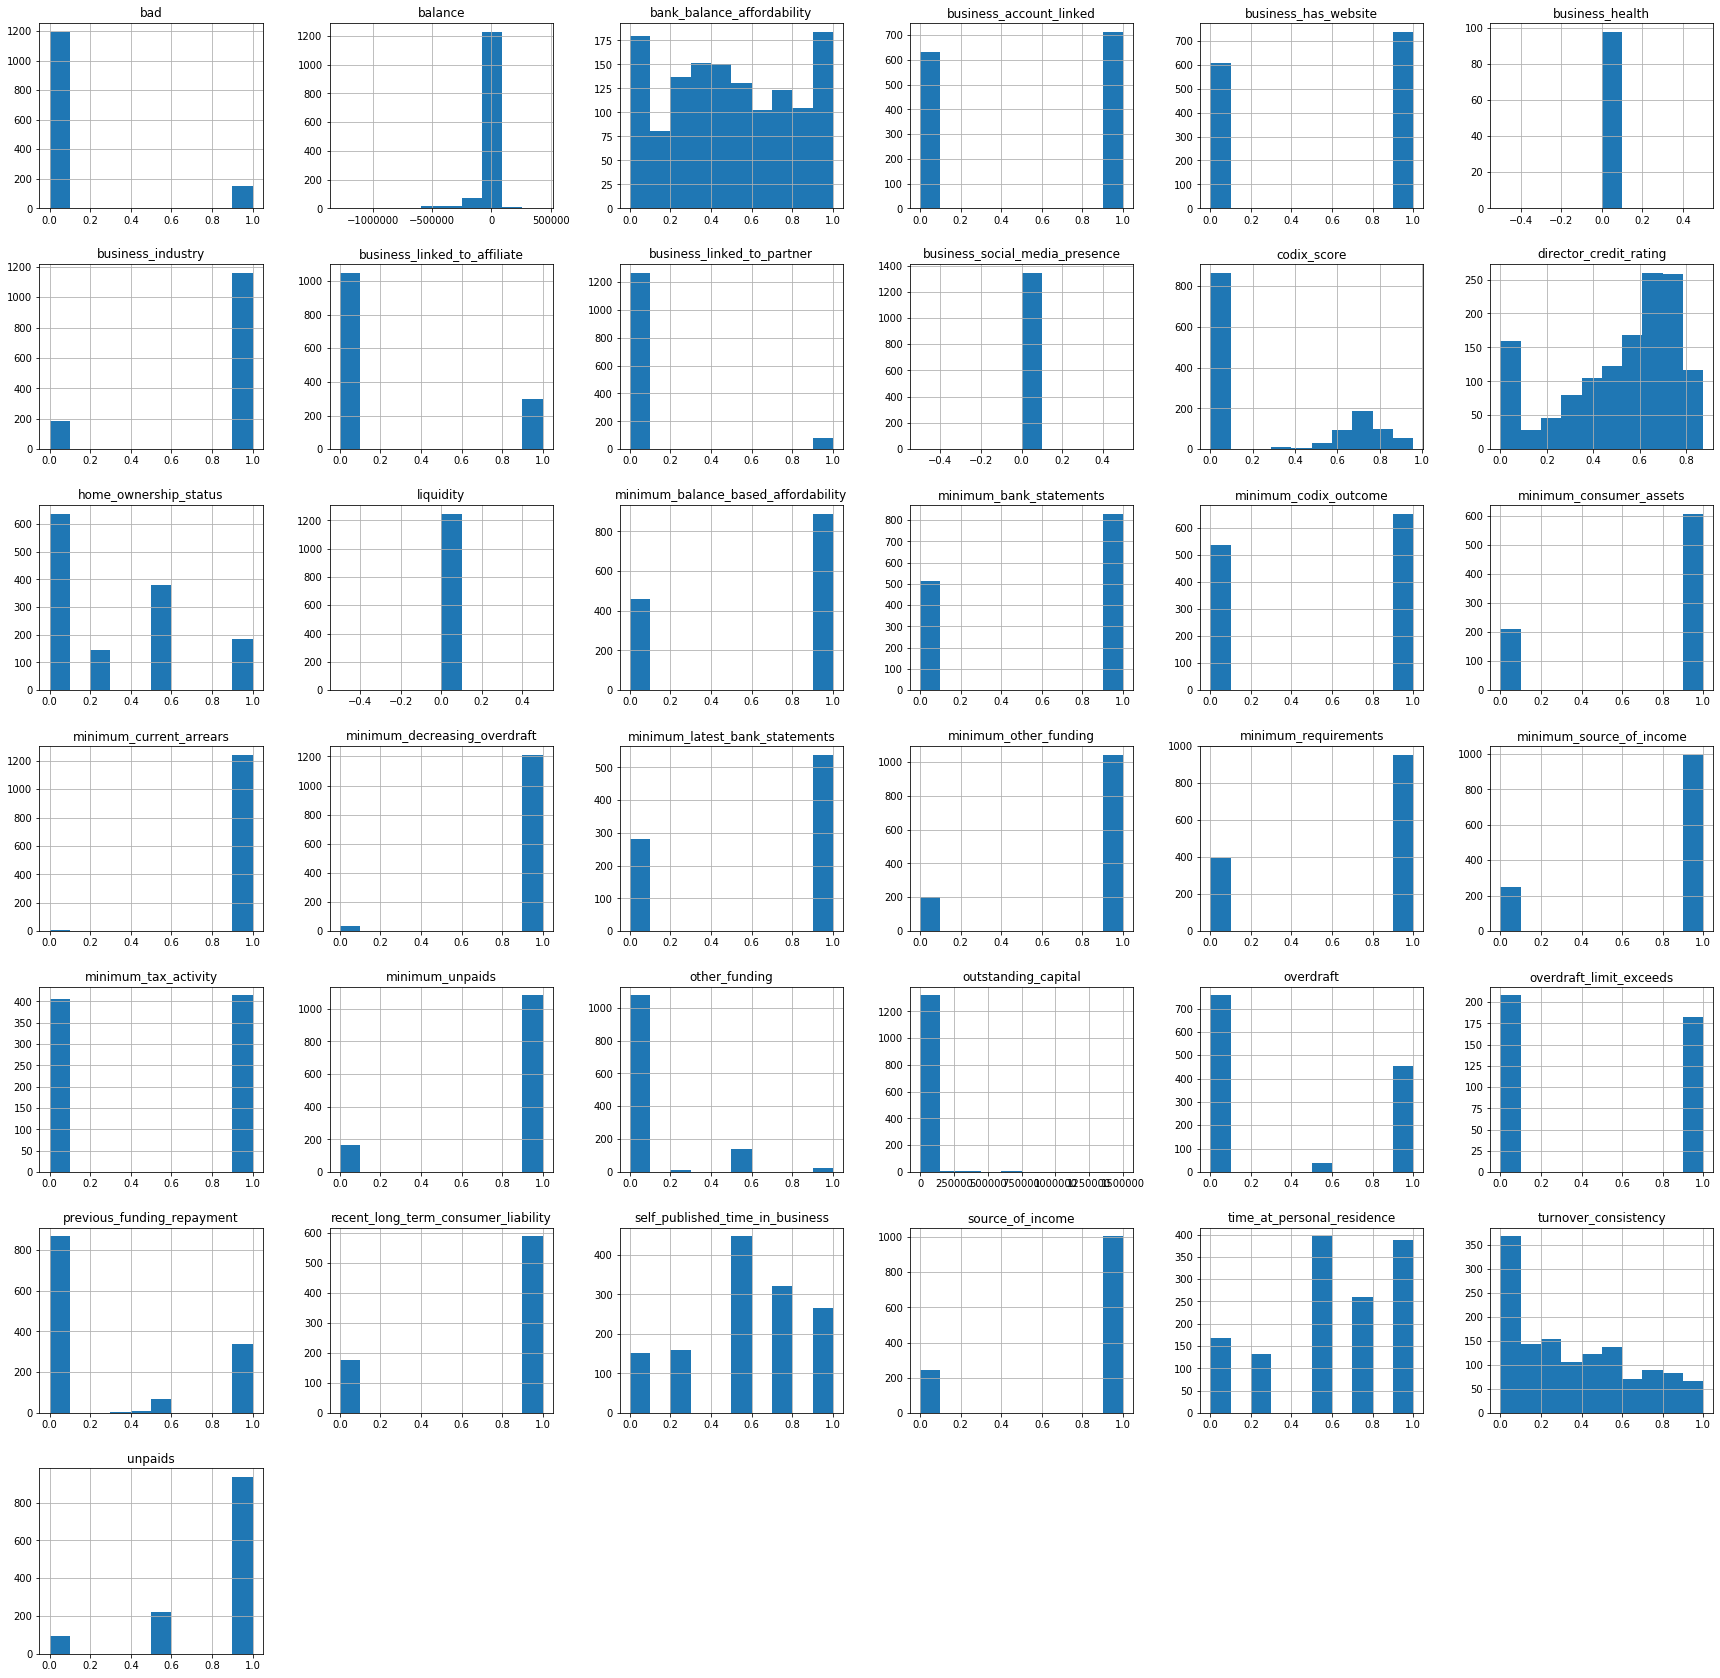

<Figure size 432x288 with 0 Axes>

In [218]:
df.hist(figsize=(30,30))
plt.figure()
plt.show()

 There are 6 continuous features. They are 'outstanding_capital', 'balance', 'director_credit_rating', 'codix_score', 'bank_balance_affordability' and 'turnover_consistency'.
 
 There are 7 categorical features that have more than 2 categories. They are 'other_funding', 'unpaids', 'overdraft', 'previous_funding_repayment', 'self_published_time_in_bussiness', 'home_ownership_status' and 'time_at_personal_residence'.
 
 There are 3 features that are always 0. They are 'liquidity', 'bussiness_health' and 'bussiness_social_media_presence'.
 
 The other 21 features are binary whose outcomes are either 0 or 1.

#### Continuous Features
We look at the distributions of continuous features in general and their distribution in group bad is 1 and bad is 0.

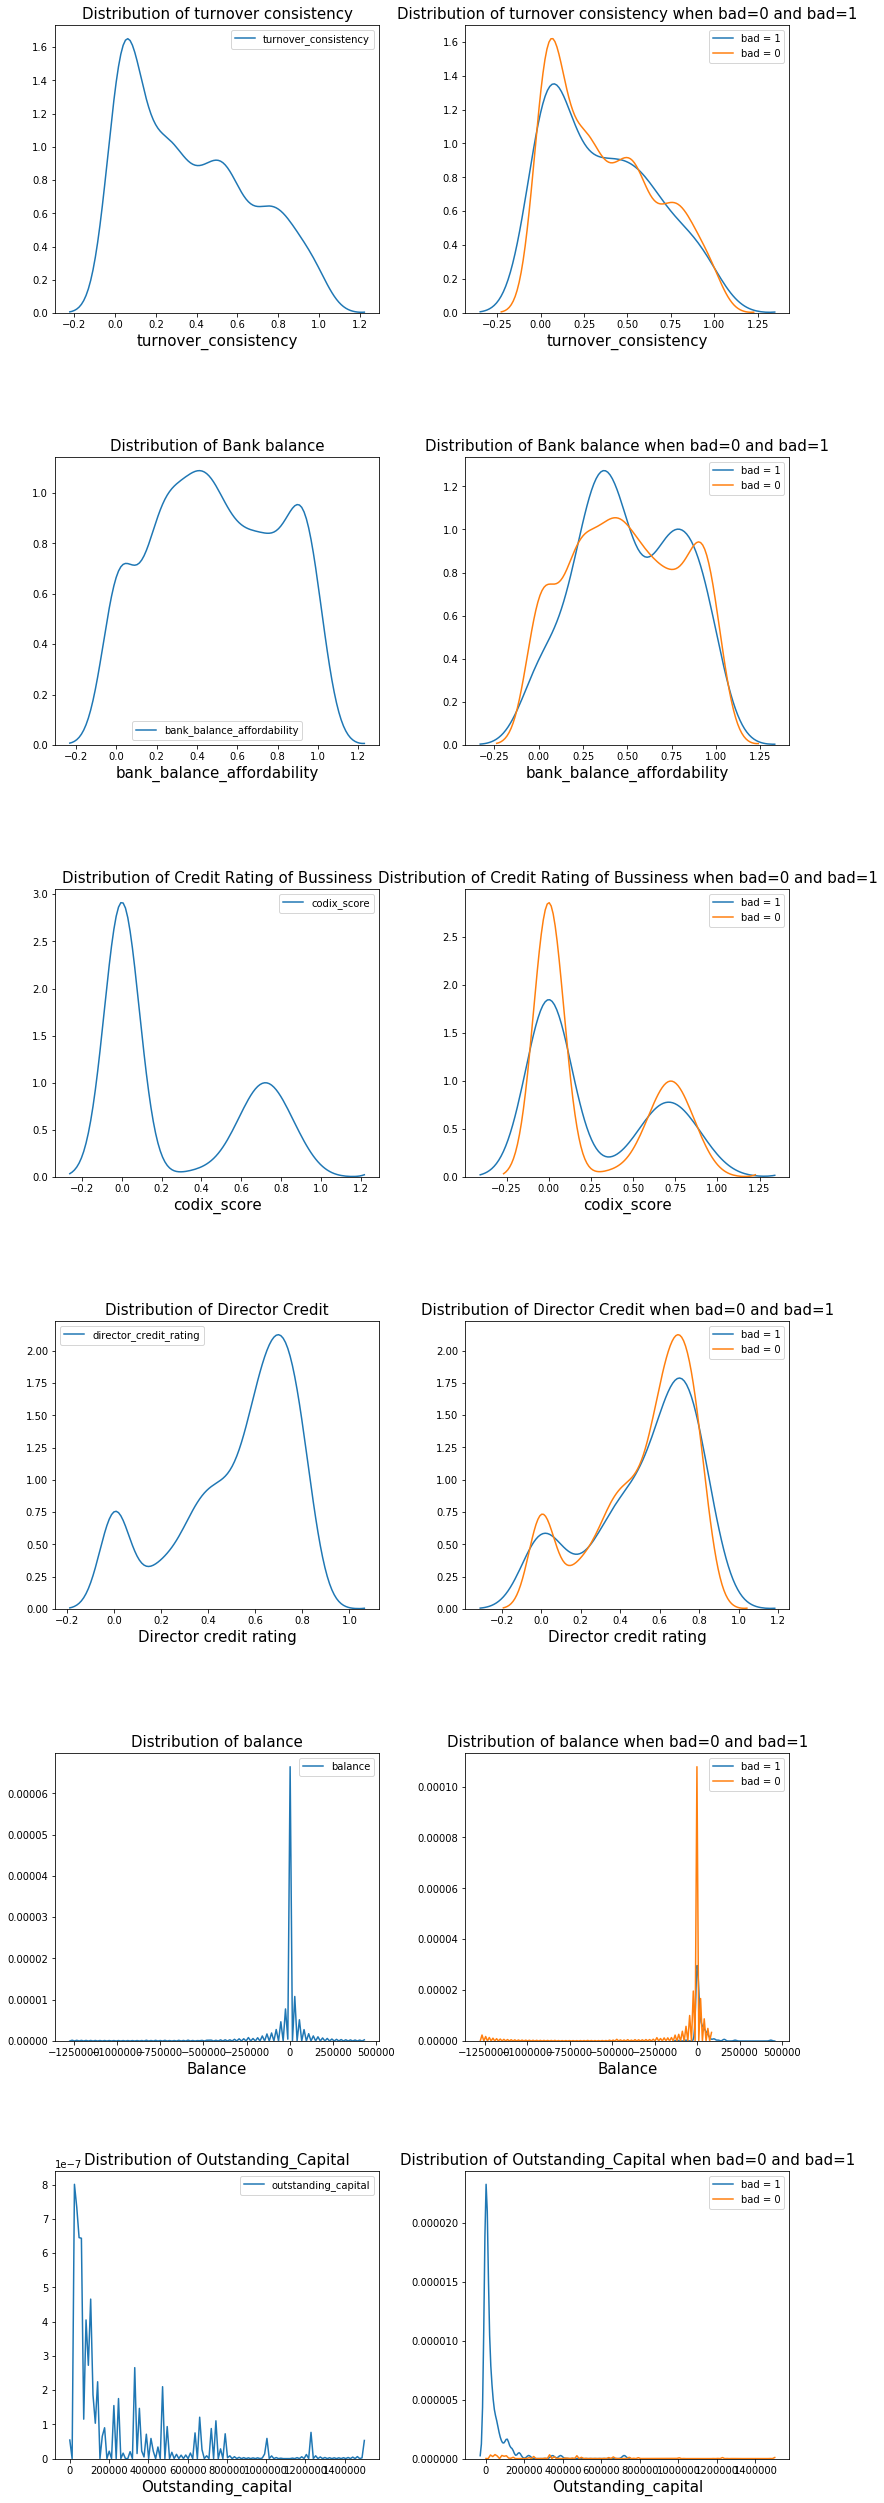

In [235]:
plt.axes([0.05,0.05,0.75,1])
sns.kdeplot(df['outstanding_capital'])
plt.xlabel('Outstanding_capital',fontsize=15)
plt.title('Distribution of Outstanding_Capital',fontsize=15);

plt.axes([1,0.05,0.75,1])
sns.kdeplot(df.loc[df['bad'] == 1, 'outstanding_capital'], label = 'bad = 1')
sns.kdeplot(df.loc[df['bad'] == 0, 'outstanding_capital'], label = 'bad = 0');
plt.xlabel('Outstanding_capital',fontsize=15)
plt.title('Distribution of Outstanding_Capital when bad=0 and bad=1',fontsize=15);

plt.axes([0.05,1.5,0.75,1])
sns.kdeplot(df['balance'])
plt.xlabel('Balance',fontsize=15)
plt.title('Distribution of balance',fontsize=15);

plt.axes([1,1.5,0.75,1])
sns.kdeplot(df.loc[df['bad'] == 1, 'balance'], label = 'bad = 1')
sns.kdeplot(df.loc[df['bad'] == 0, 'balance'], label = 'bad = 0');
plt.xlabel('Balance',fontsize=15)
plt.title('Distribution of balance when bad=0 and bad=1',fontsize=15);

plt.axes([0.05,3,0.75,1])
sns.kdeplot(df['director_credit_rating'])
plt.xlabel('Director credit rating',fontsize=15)
plt.title('Distribution of Director Credit',fontsize=15);

plt.axes([1,3,0.75,1])
sns.kdeplot(df.loc[df['bad'] == 1, 'director_credit_rating'], label = 'bad = 1')
sns.kdeplot(df.loc[df['bad'] == 0, 'director_credit_rating'], label = 'bad = 0');
plt.xlabel('Director credit rating',fontsize=15)
plt.title('Distribution of Director Credit when bad=0 and bad=1',fontsize=15);

plt.axes([0.05,4.5,0.75,1])
sns.kdeplot(df['codix_score'])
plt.xlabel('codix_score',fontsize=15)
plt.title('Distribution of Credit Rating of Bussiness',fontsize=15);

plt.axes([1,4.5,0.75,1])
sns.kdeplot(df.loc[df['bad'] == 1, 'codix_score'], label = 'bad = 1')
sns.kdeplot(df.loc[df['bad'] == 0, 'codix_score'], label = 'bad = 0');
plt.xlabel('codix_score',fontsize=15)
plt.title('Distribution of Credit Rating of Bussiness when bad=0 and bad=1',fontsize=15);

plt.axes([0.05,6,0.75,1])
sns.kdeplot(df['bank_balance_affordability'])
plt.xlabel('bank_balance_affordability',fontsize=15)
plt.title('Distribution of Bank balance',fontsize=15);

plt.axes([1,6,0.75,1])
sns.kdeplot(df.loc[df['bad'] == 1, 'bank_balance_affordability'], label = 'bad = 1')
sns.kdeplot(df.loc[df['bad'] == 0, 'bank_balance_affordability'], label = 'bad = 0');
plt.xlabel('bank_balance_affordability',fontsize=15)
plt.title('Distribution of Bank balance when bad=0 and bad=1',fontsize=15);

plt.axes([0.05,7.5,0.75,1])
sns.kdeplot(df['turnover_consistency'])
plt.xlabel('turnover_consistency',fontsize=15)
plt.title('Distribution of turnover consistency',fontsize=15);

plt.axes([1,7.5,0.75,1])
sns.kdeplot(df.loc[df['bad'] == 1, 'turnover_consistency'], label = 'bad = 1')
sns.kdeplot(df.loc[df['bad'] == 0, 'turnover_consistency'], label = 'bad = 0');
plt.xlabel('turnover_consistency',fontsize=15)
plt.title('Distribution of turnover consistency when bad=0 and bad=1',fontsize=15);

plt.show()

#### Binary Features.
The pie charts give us better idea of the poportion of 0 and 1 in the binary features.

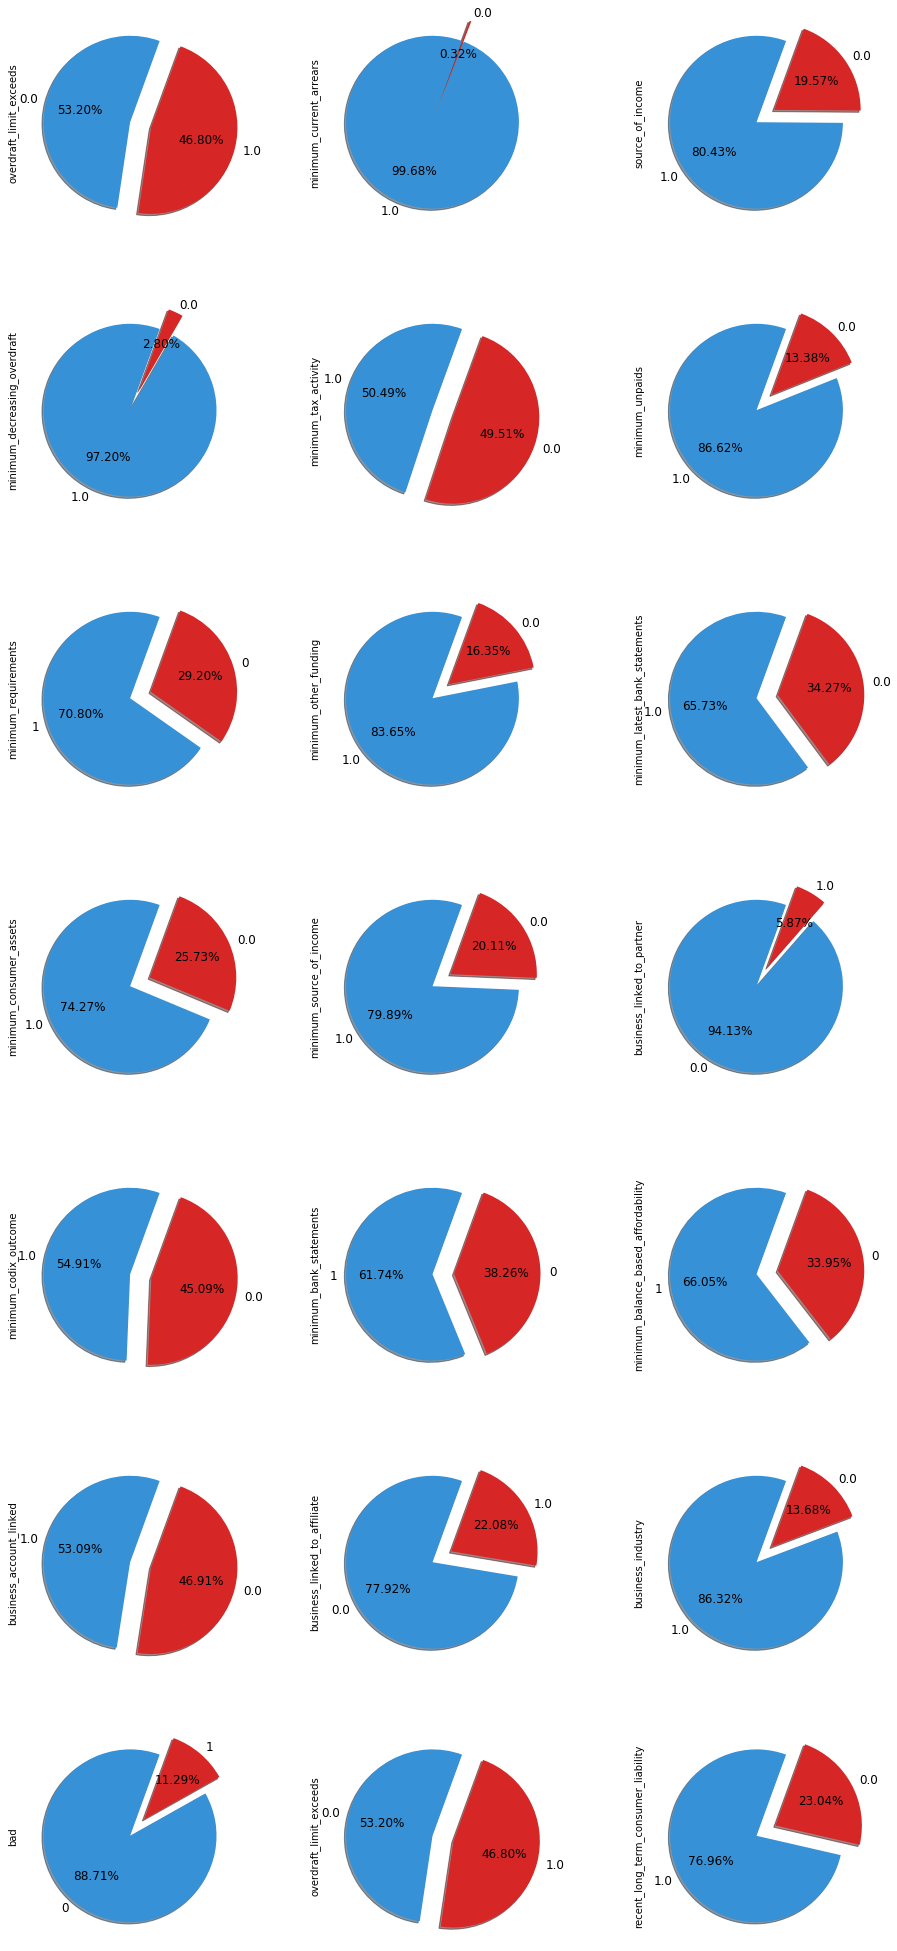

In [236]:

colors = ["#3791D7", "#D72626"]

plt.axes([0.05,0.05,0.75,0.75])

df['bad'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)
                                             #fontsize=12, startangle=70)
#df['business_account_linked'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             #fontsize=12, startangle=70)
plt.axes([0.75,0.05,0.75,0.75])

df['overdraft_limit_exceeds'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)
    
plt.axes([1.5,.05,0.75,0.75])

df['recent_long_term_consumer_liability'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.05,1,0.75,0.75])

df['business_account_linked'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.75,1,0.75,0.75])

df['business_linked_to_affiliate'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([1.5,1,0.75,0.75])

df['business_industry'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.05,2,0.75,0.75])

df['minimum_codix_outcome'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.75,2,0.75,0.75])

df['minimum_bank_statements'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([1.5,2,0.75,0.75])

df['minimum_balance_based_affordability'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.05,3,0.75,0.75])

df['minimum_consumer_assets'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.75,3,0.75,0.75])

df['minimum_source_of_income'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([1.5,3,0.75,0.75])

df['business_linked_to_partner'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.05,4,0.75,0.75])

df['minimum_requirements'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.75,4,0.75,0.75])

df['minimum_other_funding'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([1.5,4,0.75,0.75])

df['minimum_latest_bank_statements'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.05,5,0.75,0.75])

df['minimum_decreasing_overdraft'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.75,5,0.75,0.75])

df['minimum_tax_activity'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([1.5,5,0.75,0.75])

df['minimum_unpaids'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.05,6,0.75,0.75])

df['overdraft_limit_exceeds'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([0.75,6,0.75,0.75])

df['minimum_current_arrears'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)

plt.axes([1.5,6,0.75,0.75])

df['source_of_income'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors,fontsize=12, startangle=70)


plt.show()

### Correlation Matrix
we now explore the correlation between the features. 

[Text(0.5, 0, 'bad'),
 Text(1.5, 0, 'outstanding_capital'),
 Text(2.5, 0, 'balance'),
 Text(3.5, 0, 'overdraft_limit_exceeds'),
 Text(4.5, 0, 'recent_long_term_consumer_liability'),
 Text(5.5, 0, 'minimum_latest_bank_statements'),
 Text(6.5, 0, 'minimum_consumer_assets'),
 Text(7.5, 0, 'minimum_tax_activity'),
 Text(8.5, 0, 'other_funding'),
 Text(9.5, 0, 'minimum_other_funding'),
 Text(10.5, 0, 'unpaids'),
 Text(11.5, 0, 'minimum_unpaids'),
 Text(12.5, 0, 'minimum_source_of_income'),
 Text(13.5, 0, 'minimum_decreasing_overdraft'),
 Text(14.5, 0, 'source_of_income'),
 Text(15.5, 0, 'overdraft'),
 Text(16.5, 0, 'liquidity'),
 Text(17.5, 0, 'minimum_current_arrears'),
 Text(18.5, 0, 'minimum_codix_outcome'),
 Text(19.5, 0, 'previous_funding_repayment'),
 Text(20.5, 0, 'minimum_bank_statements'),
 Text(21.5, 0, 'minimum_balance_based_affordability'),
 Text(22.5, 0, 'minimum_requirements'),
 Text(23.5, 0, 'business_health'),
 Text(24.5, 0, 'self_published_time_in_business'),
 Text(25.5, 0,

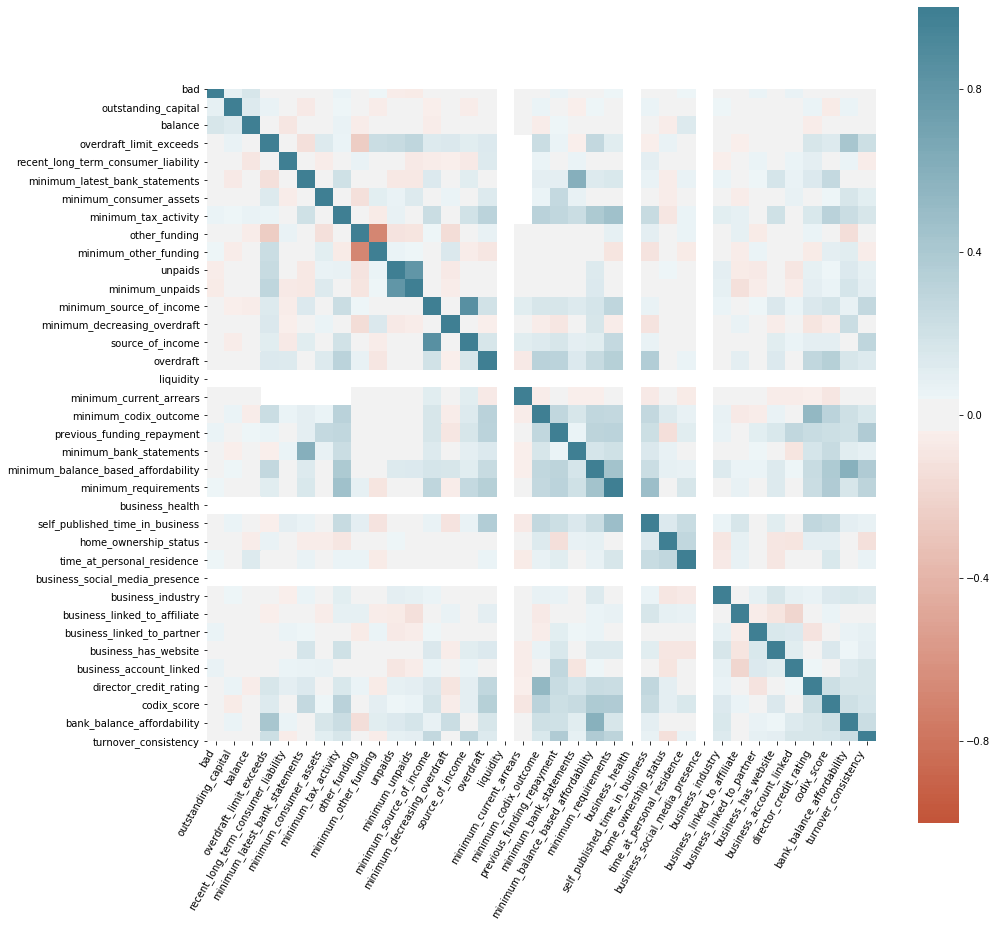

In [246]:
corr=df.corr()
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')

In [252]:
print(corr.iloc[:,0])

bad                                    1.000000
outstanding_capital                    0.083174
balance                                0.158734
overdraft_limit_exceeds                0.003717
recent_long_term_consumer_liability   -0.000323
minimum_latest_bank_statements        -0.004439
minimum_consumer_assets               -0.026137
minimum_tax_activity                   0.052386
other_funding                         -0.037881
minimum_other_funding                  0.046293
unpaids                               -0.061247
minimum_unpaids                       -0.062841
minimum_source_of_income               0.006074
minimum_decreasing_overdraft           0.013857
source_of_income                       0.001272
overdraft                             -0.027586
liquidity                                   NaN
minimum_current_arrears                0.020075
minimum_codix_outcome                  0.024971
previous_funding_repayment             0.059176
minimum_bank_statements               -0

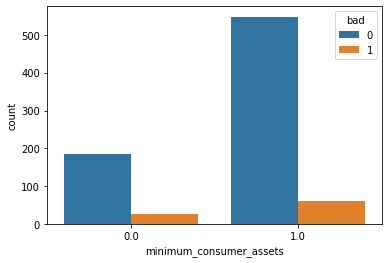

In [257]:
sns.countplot(x='minimum_consumer_assets',hue='bad',data=df)
plt.show()

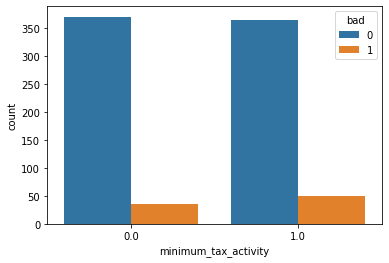

In [259]:
sns.countplot(x='minimum_tax_activity',hue='bad',data=df)
plt.show()

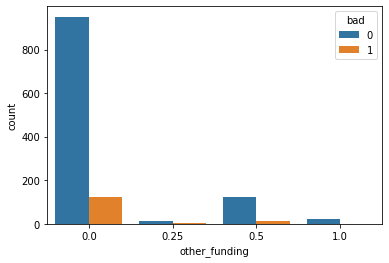

In [261]:
sns.countplot(x='other_funding',hue='bad',data=df)
plt.show()

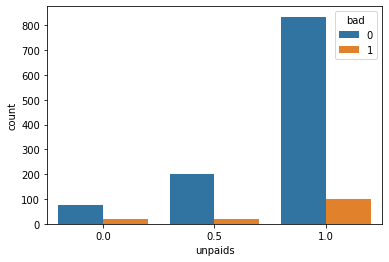

In [262]:
sns.countplot(x='unpaids',hue='bad',data=df)
plt.show()

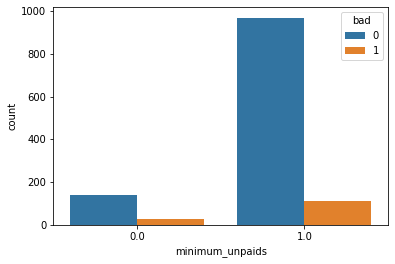

In [263]:
sns.countplot(x='minimum_unpaids',hue='bad',data=df)
plt.show()

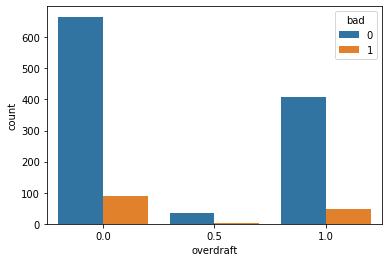

In [264]:
sns.countplot(x='overdraft',hue='bad',data=df)
plt.show()

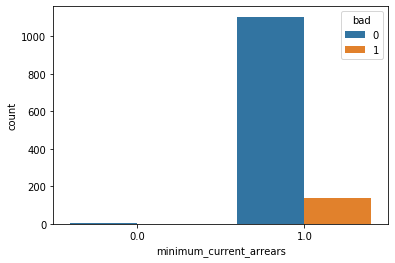

In [265]:
sns.countplot(x='minimum_current_arrears',hue='bad',data=df)
plt.show()

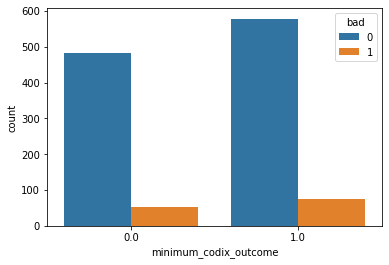

In [266]:
sns.countplot(x='minimum_codix_outcome',hue='bad',data=df)
plt.show()

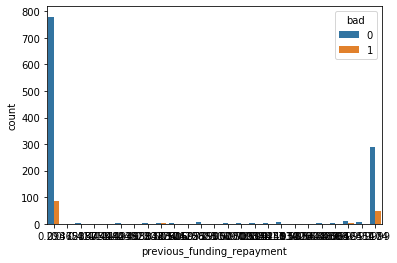

In [267]:
sns.countplot(x='previous_funding_repayment',hue='bad',data=df)
plt.show()

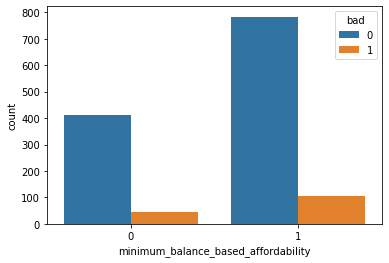

In [268]:
sns.countplot(x='minimum_balance_based_affordability',hue='bad',data=df)
plt.show()

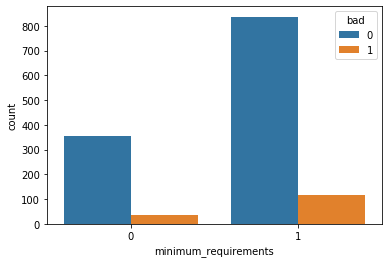

In [269]:
sns.countplot(x='minimum_requirements',hue='bad',data=df)
plt.show()

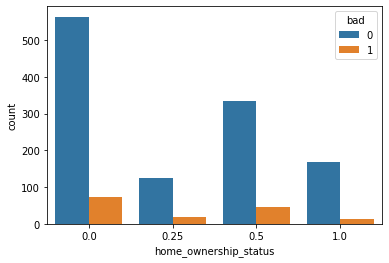

In [270]:
sns.countplot(x='home_ownership_status',hue='bad',data=df)
plt.show()

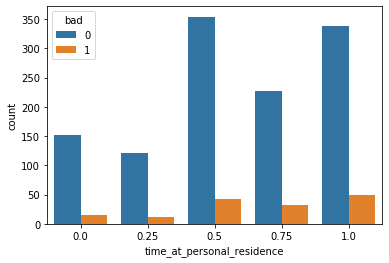

In [271]:
sns.countplot(x='time_at_personal_residence',hue='bad',data=df)
plt.show()

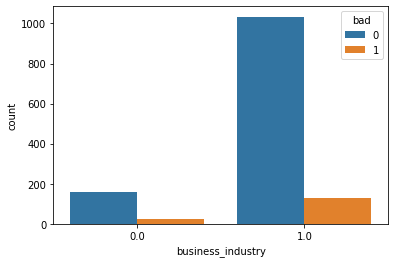

In [272]:
sns.countplot(x='business_industry',hue='bad',data=df)
plt.show()

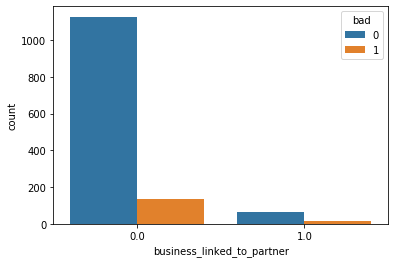

In [273]:
sns.countplot(x='business_linked_to_partner',hue='bad',data=df)
plt.show()

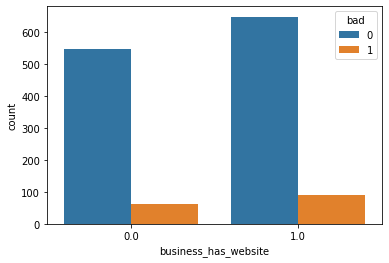

In [274]:
sns.countplot(x='business_has_website',hue='bad',data=df)
plt.show()

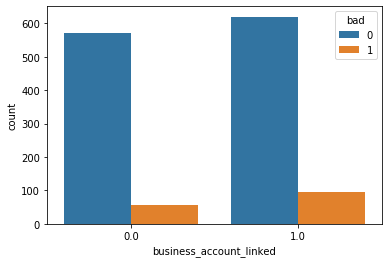

In [275]:
sns.countplot(x='business_account_linked',hue='bad',data=df)
plt.show()

## Variables Selection

In [304]:
cor_target=abs(corr['bad'])
relevant_features=cor_target[cor_target>0.03]


In [305]:
print(relevant_features)

bad                           1.000000
outstanding_capital           0.083174
balance                       0.158734
minimum_tax_activity          0.052386
other_funding                 0.037881
minimum_other_funding         0.046293
unpaids                       0.061247
minimum_unpaids               0.062841
previous_funding_repayment    0.059176
minimum_requirements          0.043266
home_ownership_status         0.030397
time_at_personal_residence    0.045399
business_linked_to_partner    0.050657
business_has_website          0.035855
business_account_linked       0.062632
Name: bad, dtype: float64


As we can see, only 14 features have some kind of relation with the target feature 'bad'. We now look at the correlations between these features to find the one highly correlated.

In [310]:
relevant_features.index.tolist()

['bad',
 'outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'other_funding',
 'minimum_other_funding',
 'unpaids',
 'minimum_unpaids',
 'previous_funding_repayment',
 'minimum_requirements',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked']

In [311]:
corr_new=corr.loc[abs(corr['bad'])>0.03,relevant_features.index.tolist()]

[Text(0.5, 0, 'bad'),
 Text(1.5, 0, 'outstanding_capital'),
 Text(2.5, 0, 'balance'),
 Text(3.5, 0, 'minimum_tax_activity'),
 Text(4.5, 0, 'other_funding'),
 Text(5.5, 0, 'minimum_other_funding'),
 Text(6.5, 0, 'unpaids'),
 Text(7.5, 0, 'minimum_unpaids'),
 Text(8.5, 0, 'previous_funding_repayment'),
 Text(9.5, 0, 'minimum_requirements'),
 Text(10.5, 0, 'home_ownership_status'),
 Text(11.5, 0, 'time_at_personal_residence'),
 Text(12.5, 0, 'business_linked_to_partner'),
 Text(13.5, 0, 'business_has_website'),
 Text(14.5, 0, 'business_account_linked')]

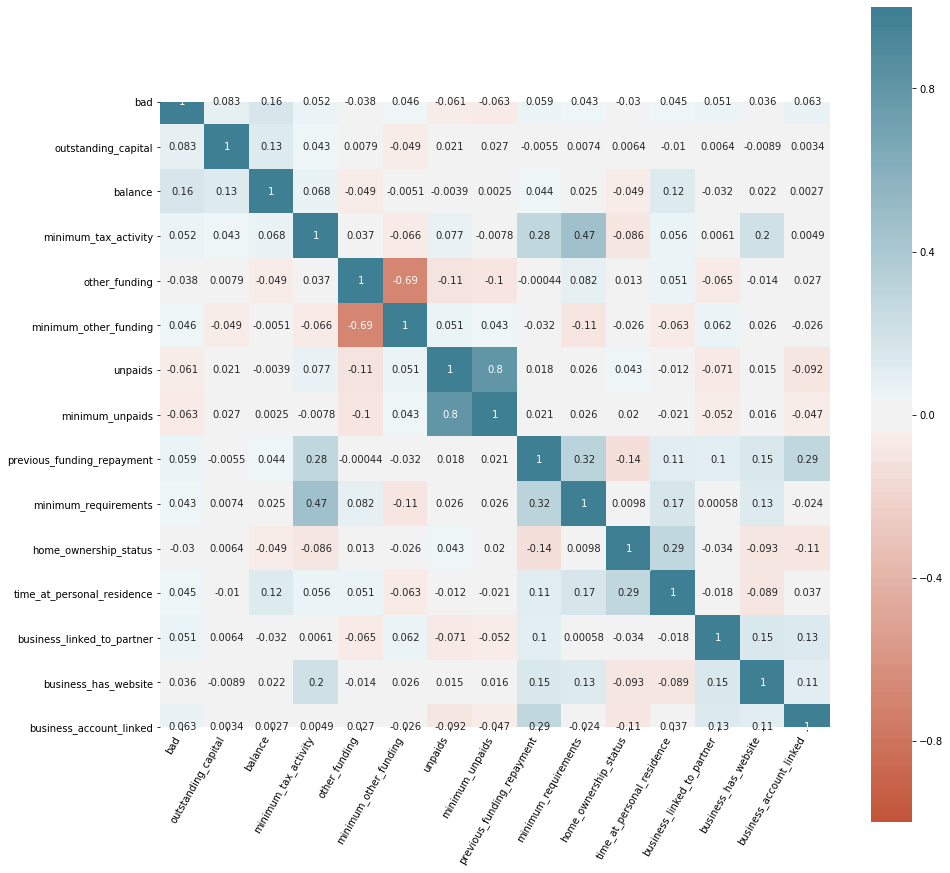

In [313]:
fig, ax = plt.subplots(figsize=(15,15))
ax=sns.heatmap(corr_new,vmin=-1,vmax=1,center=0,cmap=sns.diverging_palette(20,220,n=200),square=True,annot=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=60,horizontalalignment='right')

 From the above heat map, it is seen that two pair of features 'minimum_unpaids' and 'unpaids', 'minimum_other_funding' and 'other_funding' have high correlation. Hence, we would only keep one from each pair. We will keep 'minimum_unpaids' and 'minimum_other_funding' since their correlation with 'bad' are higher than that of 'unpaids' and 'other_funding'. Hence, the 12 independent features are  'bad','outstanding_capital','balance','minimum_tax_activity','other_funding','minimum_other_funding','unpaids','minimum_unpaids','previous_funding_repayment','minimum_requirements','home_ownership_status','time_at_personal_residence','business_linked_to_partner','business_has_website','business_account_linked', and the target variable is 'bad'.

In [316]:
new_df=df.loc[:, ['bad',
 'outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'minimum_requirements',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked']]

In [327]:
new_df.head()

,bad,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,minimum_requirements,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked
0,1,20000.00,4533.34,1.0,1.0,1.0,1.0,1,0.0,0.75,0.0,1.0,1.0
1,0,0.00,0.00,1.0,1.0,1.0,0.0,1,0.5,0.50,0.0,1.0,0.0
2,0,0.00,-19466.66,0.0,1.0,1.0,0.0,0,0.5,1.00,0.0,0.0,0.0
3,0,416666.66,52916.67,1.0,1.0,1.0,0.0,1,0.5,0.50,0.0,1.0,0.0
4,0,0.00,-87173.10,1.0,0.0,1.0,1.0,1,0.0,0.50,0.0,1.0,1.0


In [328]:
new_df.tail()

,bad,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,minimum_requirements,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked
1341,0,0.0,0.0,NaN,NaN,NaN,NaN,1,0.0,0.75,0.0,0.0,0.0
1342,0,0.0,0.0,NaN,NaN,NaN,NaN,1,0.0,0.75,0.0,0.0,0.0
1343,0,0.0,0.0,NaN,NaN,NaN,NaN,1,0.0,0.75,0.0,0.0,0.0
1344,0,0.0,0.0,NaN,NaN,NaN,NaN,1,0.0,0.25,0.0,0.0,1.0
1345,0,0.0,0.0,NaN,NaN,NaN,NaN,1,0.0,0.25,0.0,0.0,1.0


In [318]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1346 entries, 0 to 1345
Data columns (total 13 columns):
bad                           1346 non-null int64
outstanding_capital           1346 non-null float64
balance                       1346 non-null float64
minimum_tax_activity          820 non-null float64
minimum_other_funding         1248 non-null float64
minimum_unpaids               1248 non-null float64
previous_funding_repayment    1286 non-null float64
minimum_requirements          1346 non-null int64
home_ownership_status         1345 non-null float64
time_at_personal_residence    1345 non-null float64
business_linked_to_partner    1345 non-null float64
business_has_website          1345 non-null float64
business_account_linked       1345 non-null float64
dtypes: float64(11), int64(2)
memory usage: 136.8 KB


In [319]:
new_df.describe()

,bad,outstanding_capital,balance,minimum_tax_activity,minimum_other_funding,minimum_unpaids,previous_funding_repayment,minimum_requirements,home_ownership_status,time_at_personal_residence,business_linked_to_partner,business_has_website,business_account_linked
count,1346.000000,1.346000e+03,1.346000e+03,820.000000,1248.000000,1248.000000,1286.000000,1346.000000,1345.000000,1345.000000,1345.000000,1345.000000,1345.000000
mean,0.112927,1.408488e+04,-2.050561e+04,0.504878,0.836538,0.866186,0.295961,0.708024,0.304275,0.605762,0.058736,0.548699,0.530855
std,0.316621,8.625915e+04,9.118407e+04,0.500281,0.369934,0.340589,0.439670,0.454840,0.347758,0.332422,0.235217,0.497808,0.499233
min,0.000000,0.000000e+00,-1.276042e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000
50%,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,0.000000,1.000000,0.250000,0.500000,0.000000,1.000000,1.000000
75%,0.000000,0.000000e+00,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1.500000e+06,4.336423e+05,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [329]:
new_df.isnull().sum()

bad                             0
outstanding_capital             0
balance                         0
minimum_tax_activity          526
minimum_other_funding          98
minimum_unpaids                98
previous_funding_repayment     60
minimum_requirements            0
home_ownership_status           1
time_at_personal_residence      1
business_linked_to_partner      1
business_has_website            1
business_account_linked         1
dtype: int64

We observe that there are missing data in many features. We have to deal with the missing data before apply any machine learning method. Since the features with missing data are binary, we will replace the missing data NaN by the most frequent value.

### Preprocessing and Pipelines

In [347]:
from sklearn.preprocessing import Imputer
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [335]:
X=new_df.loc[:,['outstanding_capital',
 'balance',
 'minimum_tax_activity',
 'minimum_other_funding',
 'minimum_unpaids',
 'previous_funding_repayment',
 'minimum_requirements',
 'home_ownership_status',
 'time_at_personal_residence',
 'business_linked_to_partner',
 'business_has_website',
 'business_account_linked']]

In [339]:
y=new_df.loc[:,'bad']


In [332]:
imp=Imputer(missing_values='NaN', strategy='most_frequent',axis=0)

/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [348]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

#### k-Nearest Neighbors

In [341]:
steps_knn=[('imputation',imp),('knn',KNeighborsClassifier(n_neighbors=6))]

In [342]:
pipeline_knn=Pipeline(steps_knn)

In [343]:
pipeline_knn.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputation',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='most_frequent', verbose=0)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=6, p=2,
                                      weights='uniform'))],
         verbose=False)

In [344]:
y_knn_predict=pipeline_knn.predict(X_test)

In [345]:
pipeline_knn.score(X_test,y_test)

0.9257425742574258

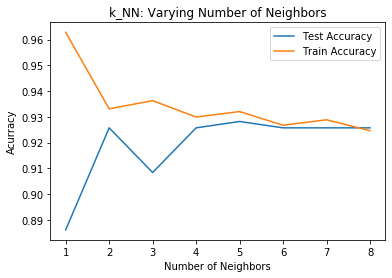

In [364]:
neighbors=np.arange(1,9)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
for i, k in enumerate(neighbors):
    steps_knn=[('imputation',imp),('knn',KNeighborsClassifier(n_neighbors=k))]
    pipeline_knn=Pipeline(steps_knn)
    pipeline_knn.fit(X_train,y_train)
    train_accuracy[i]=pipeline_knn.score(X_train,y_train)
    test_accuracy[i]=pipeline_knn.score(X_test,y_test)
    
plt.title('k_NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label='Test Accuracy')
plt.plot(neighbors, train_accuracy, label='Train Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Acurracy')
plt.show()

#### Logistic Regression

In [353]:
steps_log=[('imputation',imp),('logreg', LogisticRegression())]

In [354]:
pipeline_log=Pipeline(steps_log)

In [355]:
pipeline_log.fit(X_train,y_train)

/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('imputation',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='most_frequent', verbose=0)),
                ('logreg',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [356]:
y_log_predict=pipeline_log.predict(X_test)

In [357]:
pipeline_log.score(X_test,y_test)

0.9108910891089109

#### Support Vector Machine

In [359]:
steps_svc=[('imputation',imp),('svc', SVC())]

In [360]:
pipeline_svc=Pipeline(steps_svc)

In [361]:
pipeline_svc.fit(X_train,y_train)

/Users/vnguyenair/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Pipeline(memory=None,
         steps=[('imputation',
                 Imputer(axis=0, copy=True, missing_values='NaN',
                         strategy='most_frequent', verbose=0)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3,
                     gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [362]:
y_svc_predict=pipeline_svc.predict(X_test)

In [363]:
pipeline_svc.score(X_test,y_test)

0.8910891089108911